<a href="https://colab.research.google.com/github/xoXen/3113-Labs/blob/lab-notebooks/AY24_25_ICT3102_Week03_Introduction_to_Testing_Student_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.0 Learning Objectives

By the end of this lab, you would have learnt the following:

1. Profiling / Monitoring your Flask Web Server
2. Using JMeter to send requests to Flask Web Server
3. A very short introduction to virtual environments
4. Running and Testing the web server locally.

Unfortuantely for the last part of the labs, we will need to run it within your own local environments. However we will be using colab as the "lab sheet" for consistency.

## 3.1 Profiling / Monitoring your Flask Web Server

### 3.1.1 Running a Flask Web Server from Google Colab

In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

In [ ]:
import json
from flask import Flask, request, Response

app = Flask(__name__)

@app.route('/')
def home():
  return "<h1>hello world</h1>"

@app.route("/sort", methods=['GET'])
def sort():
  if request.method == "GET":
    unsorted = request.args.get("unsorted_list")
    unsorted = unsorted.replace('[','')
    unsorted = unsorted.replace(']','')

    unsorted = list(unsorted.split(","))
    unsorted = [int(i) for i in unsorted]
    unsorted.sort()
    return (json.dumps(unsorted))

# /sort?unsorted_list=[3,4,5,3,2,3,445,5,5,44,4]
app.run()

You can visit the domain on top and it will give you the results of the service.

### 3.1.2 Running flask_profiler on Flask

In [ ]:
import json
from flask import Flask
import flask_profiler
from flask import Flask, request, Response

app = Flask(__name__)

#fill up profiler parameters here.
app.config["flask_profiler"] = {
    "enabled": True,
    "storage": {
    "engine": "sqlite"
  },
  "basicAuth":{
    "enabled": False,
    "username": "admin",
    "password": "admin"
  },
  "ignore": [
    "^/static/.*"
  ]
}

#fill up init here.
flask_profiler.init_app(app)

@app.route("/")
def home():
  return "<h1>ICT3102 rocks~</h1>"

@app.route("/sort", methods=['GET'])
@flask_profiler.profile()
def sort():
  if request.method == "GET":
    unsorted = (request.args.get("unsorted_list"))
    unsorted = unsorted.replace('[', '')
    unsorted = unsorted.replace(']', '')

    unsorted = list(unsorted.split(","))
    unsorted = [int(i) for i in unsorted]
    unsorted.sort()
    return (json.dumps(unsorted))

app.run()

Let's now try to run a simple call to the sort API from google chrome. Like what we saw above, it should return the sorted array.

Now let's try to see this call on the flask profiler. To do that, we use go to the site:

"ip_address"/flask-profiler

It will prompt next prompt you for the password. If you did not change the user and password above, it will remain to be just user: "admin" and password: "admin".

![alt text](https://drive.google.com/uc?export=view&id=12st-CQKMahvaVbwqEaA4Ihuvq-Sw8LvL)

Thus in a very easy fashion, we have managed to profile all the calls to the different endpoints of a web server. It shows the number of times the api was called, the average elapsed time per API call, the max and min timings the call need to execute. This timing is the **running + waiting time**. *Why?*

## 3.2 Introduction to JMeter

This lab will introduce you to load testing and stress testing using Apache JMeter (http://jmeter.apache.org), an open source project supported by the Apache Software Foundation. JMeter’s web site provides the following summary of its functionality:

>Apache JMeter may be used to test performance both on static and dynamic resources, Web dynamic applications. It can be used to simulate a heavy load on a server, group of servers, network or object to test its strength or to analyze overall performance under different load types.

## 3.2.1 Installing and Running JMeter

JMeter is written in Java, so you will need a computer with the Java Runtime Environment installed on it. JMeter 4.0 requires Java 8 or later.
1.	Download the latest version of JMeter from http://jmeter.apache.org/download_jmeter.cgi. You will only need the binaries for this lab.
2.	Extract the archive into some convenient folder on your computer. The archive contains a folder apache-jmeter-X.Y where X.Y is the current version number.
3.	To start JMeter, visit the bin sub-folder of apache-jmeter-X.Y.
•	On Windows systems, execute jmeter.bat
•	On Unix, Linux and MacOS X systems, execute jmeter
You can find more information about running JMeter at http://jmeter.apache.org/usermanual/get-started.html.
4. Take the directory path of the bin folder of JMeter and add it to your path environmental variable in windows.

## 3.2.1 Building a Test Plan

The following steps are **heavily** adapted from the tutorial at http://jmeter.apache.org/usermanual/build-web-test-plan.html.

Let's now setup a simple test plan with 10 users to visit the website http://www.singaporetech.edu.sg

If the 10 users are accessing just one page, then in total it will be 10 requests.

If the 10 users are accessing the two different pages in a session, it will be 20 http requests.

If the 10 users are doing two sessions, in total it will be 40 http requests.

For jmeter, we call the number of users the number of threads. Hence if we are using 10 users to access a certain page, we term it 10 users in a thread group.

**Step 3.2.1: Add number of users to the test plan.**

![alt text](https://drive.google.com/uc?export=view&id=1Wx5O6KIGRtQm1Kc10EXAVWFARKemvayR)

Here in the thread group, we see various options we can enter.

Next, increase the number of threads to 10. This means we are trying to simulate 10 users

The Ramp-Up Period signifies the time allocated for all users to have started their requests. So if we have a ramp-up period of 10 seconds, JMeter will have finished starting all the users by the end of 10 seconds. The time between each user will be the ramp-up period divided by the number of users (threads).

Note that if you set 0, JMeter will immediately start all of your users.

Finally we want the users to carry out two sessions, hence in the loop count put in the value of 2.

![alt text](https://drive.google.com/uc?export=view&id=1X554cLccthUDLGkZ-dqLhwEcO6RCFHVX)

**Step 3.2.2: Add HTTP Requests.**

As mentioned earlier, we will simulate the user going to a certain website To do that, we will do the following:

Add -> Sample -> HTTP Request



![alt text](https://drive.google.com/uc?export=view&id=1mlnwT5lWU6zVfHRNnjsbob9M_-r5L4H6)

Add in http in the Protocol.

For server name, IP, you can place the singaporetech website.

![alt text](https://drive.google.com/uc?export=view&id=1jDk46jJL7UV7g4veYKmABY3bnGK8KbPe)

**Step 3.2.3: Add the results tree.**

Finally, add in the results tree.

![alt text](https://drive.google.com/uc?export=view&id=1leVrxQDLivK5dyRk2a06ORWdBMlNjGps)

Pressing the play button will simulate calls to the home page of the website you have keyed in. You should get the very nice green colored icons below:

![alt text](https://drive.google.com/uc?export=view&id=1-4bud6Zi3redMi_bjpyHpH8o_AqMVUyo)

Let's now assume you wish to call the sort function. You key in the sort function in the path. At the bottom there is a "add" button. That button helps you to add an input variable to your GET request. Use it to add the unsorted list variable, and a list of unsorted numbers.

![alt text](https://drive.google.com/uc?export=view&id=187syfXJMnJp3dssrWVXTdyjH3LbzIs3Q)

Now you can press the play button. However note that when you press the play button, there is a high chance that your server will crash and you will see the following output:

![alt text](https://drive.google.com/uc?export=view&id=1HCz_MGIkw10MRM2RbT2o-XIfH4S-bg6U)

You may also notice that your the server running on your colab has crashed. *Why...?*

Edit the numbers in your threads to something that is more comfortable with the free tier option you have and press the run button again. This time round you should see the following successful run:

![alt text](https://drive.google.com/uc?export=view&id=1fLVDIvQNxh81S5glisGDyxCOungAq_3V)

Once your test plan is working correctly, JMeter recommends that you remove the View Results Tree node since it consumes a lot of resources and is not necessary for running a real test.

JMeter can also test SQL servers, FTP servers, LDAP servers, web services and the Java Message Service using much the same procedure; you can browse through tutorials on all of these by following the “Next” links on each tutorial page but you do not need to complete them for this lab.

Instead of entering a series of HTTP requests manually, you can use JMeter to record the requests made by a web browser during normal use. This recording can then be made into a test plan. The appendix “Building More Realistic Test Scripts” below describes how to record a browser session, but it is not necessary to do this for the purposes of this lab.


## 3.3 Introduction to Virtual Environments



In most programming languages, you typically import libraries along the way as you use them. That goes the same in python. However in python, there may be an issue at times with incompatable library versions. For instance, when using library ABC, it may require library XYZ to be specifically of version 2. This poses a problem in the event we have another project using library PQR, and this time it requires library XYZ to be of version 1.

One of the solutions to this is known as virtual environments.

### What are virtual environments?

"A virtual environment is a Python environment such that the Python interpreter, libraries and scripts installed into it are isolated from those installed in other virtual environments, and (by default) any libraries installed in a “system” Python, i.e., one which is installed as part of your operating system."

In our current situation, we are running an environment within the main "system" python. We can tell what the libraries that are installed in the "system" python using the following function:

In [ ]:
pip freeze

**Step 3.3.1: Start Command Prompt.**

*   Start command prompt by pressing on the windows button on your keyboard.
*   Type the command "cmd"
*   Press "enter"

![alt text](https://drive.google.com/uc?export=view&id=1u_AUGhD47wl3kSf02xYqjWvSIcxPgXzP)

**Step 3.3.2: Execute pip freeze on your local environment.**

*   Type "pip freeze" in your command window

![alt text](https://drive.google.com/uc?export=view&id=12HwJQR38qp4wcqDaQ4MzqElSROc4d0S1)

**Step 3.3.3: Install Flask to the new virtual environment.**

*   Type "pip install virtualenv"
*   Type "virtualenv test_env". This creates a virtual environment within your local system, known as test_env
*   Type ".\test_env\Scripts\activate"

![alt text](https://drive.google.com/uc?export=view&id=1a7nKn1kOrPOn6bOyW1OJE5Hib_644G_q)

![alt text](https://drive.google.com/uc?export=view&id=1BmEB9VZXpF8pXvcNTuMO11VSbKi3QwtK)

Notice that now there is a (test_env) at the start of your command directory prompt. This shows that we are now using the new virtual environment. If we do a pip freeze here we see that there are currently no packages installed in the new environment. Let's install Flask here:

*   Type "pip install Flask"
*   Type "pip freeze"

We now see the new libraries installed unto this virtualenvironment.

![alt text](https://drive.google.com/uc?export=view&id=1PPWUtBKj2YKUCxxC6vtmtkr1c5RWGSC9)


This used to be one way to quickly onboard developers, so that everybody will be on the same development environments within a very short span of time. Today there are slightly more sophiscated ways such as using docker to standardize the environments everybody is using. We will explore a bit of both this and next week.

## 3.4 Running and Testing the web server locally.

We will now be running the web server in the local environment. This is so that we will be able to monitor it from the environment. However do take note of this. We typically need to seperate the tester and web server environment into two different machines. This form of testing will not be as accurate, as the tester also takes up the same resouces as that of the web server. We will look into how we can circumvant this in 3.5.




### 3.4.1 Running the web server locally.

We will be using the virtual environment that we set up in our earlier section 3.3. In this environment, we will need to install two new libraries. They are Flask and flask_profiler. (Flask should have been installed in 3.3) Hence please execute the commands on your local cmd terminal.

```
pip install flask_profiler
```

Thereafter, please verify that the libraries are installed with

```
pip freeze
```

![alt text](https://drive.google.com/uc?export=view&id=1K6CQkvs6qHwtwQnGQILp04wlBXDr8-3x)


We will now be running the following piece of code as the server.


```
import json
from flask import Flask
import flask_profiler
from flask import Flask, request, Response

app = Flask(__name__)
app.config["flask_profiler"] = {
    "enabled": True,
    "storage": {
    "engine": "sqlite"
  },
  "basicAuth":{
    "enabled": True,
    "username": "admin",
    "password": "admin"
  },
  "ignore": [
    "^/static/.*"
  ]
}

flask_profiler.init_app(app)

@app.route("/")
def home():
  return "<h1>ICT3102 rocks~</h1>"

@app.route("/sort", methods=['GET'])
@flask_profiler.profile()
def sort():
  if request.method == "GET":
    unsorted = (request.args.get("unsorted_list"))
    unsorted = unsorted.replace('[', '')
    unsorted = unsorted.replace(']', '')

    unsorted = list(unsorted.split(","))
    unsorted = [int(i) for i in unsorted]
    unsorted.sort()
    return (json.dumps(unsorted))

app.run(debug=True)
```


![alt text](https://drive.google.com/uc?export=view&id=1AVtuPG4jWx8Hiw8CKzRK25cMPQePvhj_)

You will now be able to access the following pages:

![alt text](https://drive.google.com/uc?export=view&id=1s_Yw0MuIUj8X2ru7puP5EcgdTxwUN8WM)

### 3.4.2 Testing the web server locally.

Let's now redo the JMeter to point to localhost instead. Simply update the server name to 127.0.0.1 as well as the port to 5000.

![alt text](https://drive.google.com/uc?export=view&id=1PfASpknI5NtwrF-6R-rcsbciOCgOq2Zc)

You will find that you are able to greatly increase the number of users etc. Let us try with just 1000 users in 10 seconds.

At this point, two strange bugs occur. The first, is it strangely changes the text color to purple color, which is quite strange.

![alt text](https://drive.google.com/uc?export=view&id=1j5LA8ojeX-3SgzIom_i91a-w2kW2c5a8)

The second more serious bug is a complaint of a recursive use of cursors. This typically occurs when the sql database is using just one single cursor but is being reused because the processes are coming into the database too quickly (we will look into how we can resolve this in the second part of the course when we talk about databases).

Fortunately this bug can be easily solved just by changing the sqlite database into a mongodb one. This is done by first.

```
pip install pymongo
```

On the command line. Thereafter replace the line sqlite with mongodb

```
app = Flask(__name__)
app.config["flask_profiler"] = {
    "enabled": True,
    "storage": {
    "engine": "mongodb"
  },
  "basicAuth":{
    "enabled": True,
    "username": "admin",
    "password": "admin"
  },
  "ignore": [
    "^/static/.*"
  ]
}
```

Hopefully your cpu is able to support this. If it is too heavy, just try to reduce the number of users, or increase the number of seconds. This is the unfortunate case where it is probably the profiler that is limiting the throughput of the system under test.



Go to the flask_profiler package in your virtual environment (in this case the name of the virtual environment is lab03). We need to change a bit of code in the profiler for this to work properly.

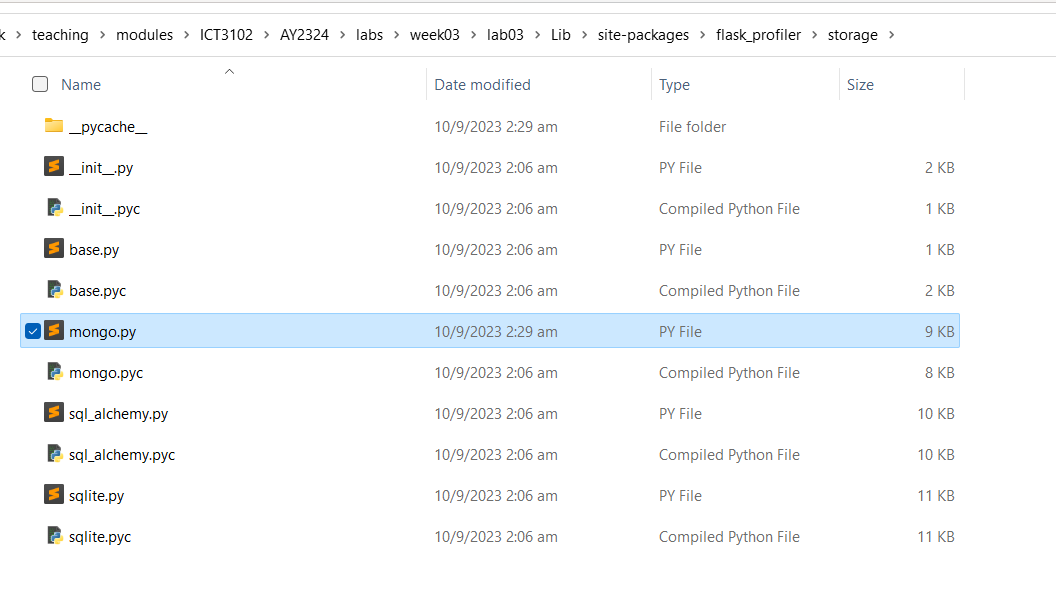

After that find in line 22 the following piece of code. Please change it to cretae_index instead.

```
    def createIndex():
        self.collection.create_index(
            [
                ('startedAt', 1),
                ('endedAt', 1),
                ('elapsed', 1),
                ('name', 1),
                ('method', 1)]
            )
```





### 3.4.3 Testing the web server locally non gui mode


You can execute the test in the JMeter GUI using the Start button on the tool bar (it has a green triangular “play” icon), or the same option on the Run menu, but JMeter recommends that you conduct real tests in non-GUI mode “to get the optimal results from it”. To do this, first save the test plan.

Then start JMeter from the command line using

```
jmeter -n -t test-plan.jmx -l test-results.csv -e -o report-folder
```

where test-plan.jmx is the name of the file in which you saved your test plan, test-results.csv is the name of a file that will contain the results of each HTTP request, and report-folder is the name of a folder in which JMeter will generate an HTML “report dashboard”. **Both the test results file and report folder must be non-existent or empty prior to running the test.**

After running the test, test-results.csv contains one row for each request recording the time elapsed, the result of the request, the size of the response and various other statistics. The report dashboard contains a web page (index.html) containing various summary statistics and charts. Spend some time familiarising yourself with both of these reports.

For more information on running JMeter in non-GUI mode, see http://jmeter.apache.org/usermanual/get-started.html#non_gui. Full documentation for the report dashboard is in Section 14 of the User Manual, http://jmeter.apache.org/usermanual/generating-dashboard.html.


After the lab, do spend some time playing around with the numbers and reports. This part of the lab works for my cpu, and it definately will not work for you. It may not work during the actual lab itself as we are now running different processes during the lab session (eg zoom). The specific numbers used are:

*   5000 threads
*   50 second ramp up
*   2 seconds

What we are looking for is something known as a knee:

![alt text](https://drive.google.com/uc?export=view&id=1Bi86mI13zhJMs2wz3jZ5kwWfnTxF0Dg7)

In this case, the knee occurs at about 17 concurrent users if I wish to keep the response time at below 50ms. Again a reminder, you probably will not get the exact same results as me, so do not worry if yours is different. During the lab, I will try to demonstrate this, however do not worry if you do not get this exact same result. In fact it is normal if you do not get this exact same result.

## 3.5 (Optional. Not covered today.) Running and Testing the web server from Docker.

### 3.5.1 Running the web server from Docker.

Download the zip file from xsite. From the zip file, unzip it and you should see the following file structure.

![alt text](https://drive.google.com/uc?export=view&id=1DXdoVdAdnGZjaWUeiON6PRy-z0HffM5S)

(Make sure that your docker desktop is running). From there key in the command prompt "docker-compose up". It should start downloading the various resouces, and you will be able to access the server once again from your local host. Do note that I have disabled flask profiling in this example.


In your own programming projects, you may follow the way the volumes are being mounted. Note this supports hot reloading, means that you do not need to rebuild the images every time you change the code. This makes it extremely easy to deploy and debug.

### 3.5.2 Testing the docker web server.

If you were to run the earlier test from 3.4.3 with the parameters

*   5000 threads
*   50 second ramp up
*   2 seconds
All of us should get the same graph now. This is because the dockerfile has limited the resouces the container is able to access to just:

```
    mem_limit: 256m
    mem_reservation: 128M
    cpus: 0.5    
```

This is definitely not sufficient for our test.

![alt text](https://drive.google.com/uc?export=view&id=1q7XHgyKIVIHDKDJcbfIWywTXCTrc-zk_)

Let's try to reduce the parameters a bit.

*   2000 threads
*   50 second ramp up
*   2 seconds

We now see a very smooth ramp up, which may show that the server is not yet at its load.

![alt text](https://drive.google.com/uc?export=view&id=1Yc8C2KPyxwlSnIITmIO9HXMvwDp5MCmT)

Let's try to reduce the parameters a bit.

*   2800 threads
*   50 second ramp up
*   2 seconds

We now see a very smooth ramp up, which may show that the server is not yet at its load.

![alt text](https://drive.google.com/uc?export=view&id=1T8B4J4w-hBbCpBZK_A2mCqraLmQ9-MpY)


The interarrival time of the first test is 50 / 5000 = 0.01 seconds.

The interarrival time of the final test is 50 / 2800 = 0.018 seconds, approximately double that of the first. This is because of the cpu in the docker being cut into just 0.5. Note that the number of people supported is also approximately cut into half, about 7-8.

### 3.5.3 Reducing the docker web server.

Let's reduce the resouces provided by the docker web server now:


```
    mem_limit: 256m
    mem_reservation: 128M
    cpus: 0.25    
```


Running the test on the parameters

*   1500 threads
*   50 second ramp up
*   2 seconds

Gives us the quite expected graph of the knee being at 3-4 people.

![alt text](https://drive.google.com/uc?export=view&id=1MqxBkhYwEVyrTj9OEReyOg-gt4zI5L2o)

## Appendix – Building More Realistic Test Plans

Many web applications involve much more sophisticated interactions than simply downloading a static web page. Constructing a test plan mimicking complex interactions, such as purchasing items from an on-line shop, might be quite difficult and tedious. Fortunately, JMeter provides a way of recording an interaction between a user and web site, and copying the sequence of HTTP requests that result into a test plan.

For information on how to do this, visit the “Recording Tests” tutorial listed under “Tutorials” on the JMeter home page (http://jmeter.apache.org/usermanual/jmeter_proxy_step_by_step.html). Don’t forget to stop the HTTP Test Script Recorder and change your proxy settings back to normal when you have finished recording.

JMeter’s HTTP Script Recorder is sufficient for creating load test plans. If you want to examine the behaviour of a web browser as it navigates a web application in greater detail, you might prefer to use the developer tools of your web browser, or a third party tool like Fiddler (http://www.telerik.com/fiddler/web-app-performance-testing).